<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/tensorflow2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline 
tf.__version__

'2.3.0'

https://davinci-ai.tistory.com/20  용어개념설명

편향  = 예측 값과 실제 값의 차이

# *MNIST dataset 준비하기*

http://hleecaster.com/ml-normalization-concept/

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # 모든값을 0~1사이로 만들어주는 최소-최대 정규화

print("x_train={0}".format(x_train.shape))
print("y_train={0}".format(y_train.shape))
print("x_test={0}".format(x_test.shape))
print("y_test={0}".format(y_test.shape))

x_train=(60000, 28, 28)
y_train=(60000,)
x_test=(10000, 28, 28)
y_test=(10000,)


 0~255사이의 값을 255.0으로 나누게되면 0 ~ 1사이의 값으로 바뀐다. 이것을 Min-Max Normalization 최소-최대 정규화 라고한다.
 
 학습이 더 잘되기 때문에 정규화를 한다.


(X - MIN) / (MAX-MIN) 

# test의 20개 숫자 확인

n_empty = 0 
<class 'list'>
10
1
10
2
(56, 280)


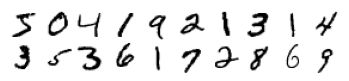

In [ ]:
test =x_train[0:20,:]#test의 데이터

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row) # 1  
    images = [instance.reshape(size,size) for instance in instances]
    # ndata[2:3,:].reshape(1,784) 을 (28,28) 로 바꿔줌
    n_rows = (len(instances) - 1) // images_per_row + 1 # 1
  

    row_images = []
    n_empty = n_rows * images_per_row - len(instances) # 0 

    print("n_empty = {0} ".format(n_empty)) # 0
    print(type(images))

    images.append(np.zeros((size, size * n_empty))) 
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        print(len(rimages))
        row_images.append(np.concatenate(rimages, axis=1))
        print(len(row_images))
    image_all = np.concatenate(row_images, axis=0)
    print(image_all.shape)
    plt.imshow(image_all, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plot_digits(test)

# 뉴럴네트워크 구조

 
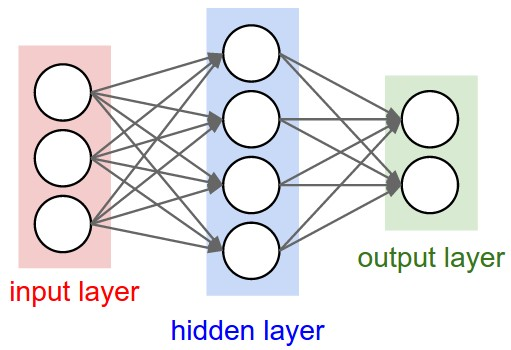

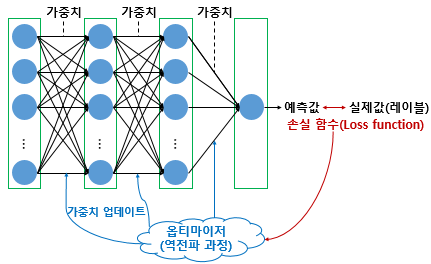

# **2층구조의 NN**

In [8]:
model = tf.keras.models.Sequential([ # 데 Sequential 모델은 순차적으로 레이어 층을 더해주기 때문에 순차모델이라고 불림.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # 128은 hidden layer에서 만들 노드 갯수.
    tf.keras.layers.Dropout(0.2), # 과적합을 피하기위해 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 평가지표를 설정 accuracy = 정확도

# 함수
- flatten : 1d로 평평하게 펴주는레이어
- Dense : fully connected 레이어. 이전 레이어의 출력과 모든 뉴런들을 연결. hidden layer을 만들어주는 역할을 함. 
- fully connected : CNN의 종류로써 이미지를 분류/설명하는데 가장 적합하게 예측.
-  Dropout :  regularization을 위해 사용하는 Dropout, 특정 비율로 뉴런을 turn off해서 학습한다.
- softmax : 그래프가 없는 활성화함수이며, 확률을 계산할때 사용함.
- Flatten(input_shape=(28,28)) : 28x28 shape의 입력데이터를 28*28 x 1로 변경해준다.

- compile : 설계한 모델을 구현하는 것이 컴파일 단계
- optimizer : 최적화는 loss function의 결괏값을 최소화하는 모델의 인자를 찾는 것을 의미
- loss(손실)함수 : 실제값과 예측값이 차이가 났을 떄, 그 오차가 얼마인지 계산해주는 함수.



- tf.keras.layers.Flatten(input_shape=(28, 28)) = 받은 데이터를 28x28 형식으로 쫙 펴준다.
- tf.keras.layers.Dense(128, activation='relu') = 128개의 노드를 생성한다는 뜻이고, activation은 활성화 레이어라는 뜻이다. 
- 활성화 함수 : Data를 비선형으로 바꾸기위해 사용하고, 입력받은 신호를 얼마나 출력할지 결정.
-  'relu' : vanishing gradient(기울기 손실)을 해결하기 위한 활성화함수.  아주 간단하게 0보다 작으면 0으로 나타내고 0보다 크게 되면 직선의 형태로 값을 가짐 
- optimizer ='adam'  =  최적화 함수는 adam을 쓴다는 의미
- loss='sparse_categorical_crossentropy' = 입력값이 다양한 종류 중 어떤 종류인지 분류하는 문제에서는 loss='sparse_categorical_crossentropy' 사용.

In [9]:
# 설계한 모델을 확인.
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Layer (type)
-  레이어의 이름과 타입을 나타냄.

Output Shape
-  None개의 행과 784개의 아웃풋 값이 주어졌다는 것. 행이 None으로 지정되는 이유는 데이터의 갯수는 계속해서 추가될 수 있기 때문에 딥러닝 모델에서는 주로 행을 무시하고 열의 shape를 맞추어줌.

Param
-  가중치의 갯수, 입력노드와 출력노드에 연결된 간선의 수.
- bias값 노드도 추가되어있음.

In [11]:
# 모델학습

model.fit(x_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9561
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9759
